In [2]:
%load_ext dotenv
%dotenv 
import os
import sys
sys.path.append(os.getenv('SRC_DIR'))
from logger import get_logger
_logs = get_logger(__name__)

In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import os
from glob import glob

c:\Users\klawa\miniconda3\envs\dsi_participant\lib\site-packages\dask\dataframe\_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
C:\Users\klawa\AppData\Local\Temp\ipykernel_16076\1500862777.py:1: DeprecationWarning: The current Dask DataFrame implementation is deprecated. 
In a future release, Dask DataFrame will use new implementation that
contains several improvements including a logical query planning.
The user-facing DataFrame API will remain unchanged.

The new implementation is already available and can be enabled by
installing the dask-expr library:

    $ pip install dask-expr

and turning the query planning option on:

    >>> import dask
    >>> dask.config.set({'dataframe.query-planning': True})
    >>> import dask.dataframe as dd

API documentation for the new implementation is available at
https://docs.dask.org/en/stable/dask-expr-api.html

Any feedback can b

In [3]:
ft_dir = os.getenv("FEATURES_DATA")
ft_glob = glob(ft_dir+'/*.parquet')
df = dd.read_parquet(ft_glob).compute().reset_index()

# Sampling in Python

+ There are different packages that allow sampling.
+ A practical approach is to use pandas/Dask sampling methods.

## Random Sampling

+ Sample n rows from a dataframe with [`df.sample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html).

```
DataFrame.sample(
    n=None, frac=None, replace=False, weights=None, 
    random_state=None, axis=None, ignore_index=False
    )
```

In [4]:
df

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,sector,subsector,year,Close_lag_1,returns,positive_return,target
0,OXY,2000-01-03,10.269221,10.388979,9.939887,9.969827,5.047807,1161303,Energy,Oil & Gas Exploration & Production,2000,NaN,NaN,0,0.0
1,OXY,2000-01-04,9.790190,10.059645,9.730311,9.760251,4.941698,1576308,Energy,Oil & Gas Exploration & Production,2000,9.969827,-0.021021,0,1.0
2,OXY,2000-01-05,9.760251,9.909948,9.670432,9.820130,4.972018,1172159,Energy,Oil & Gas Exploration & Production,2000,9.760251,0.006135,1,1.0
3,OXY,2000-01-06,9.730311,10.269221,9.700372,10.089584,5.108443,3336738,Energy,Oil & Gas Exploration & Production,2000,9.820130,0.027439,1,1.0
4,OXY,2000-01-07,10.329100,10.778191,10.209342,10.388979,5.260028,3325674,Energy,Oil & Gas Exploration & Production,2000,10.089584,0.029674,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744834,INTU,2024-06-18,603.729980,610.450012,601.900024,609.679993,609.679993,1375900,Information Technology,Application Software,2024,602.520020,0.011883,1,1.0
2744835,INTU,2024-06-20,610.489990,617.659973,608.299988,616.080017,616.080017,1840000,Information Technology,Application Software,2024,609.679993,0.010497,1,1.0
2744836,INTU,2024-06-21,625.840027,634.150024,618.549988,632.150024,632.150024,3682500,Information Technology,Application Software,2024,616.080017,0.026084,1,0.0
2744837,INTU,2024-06-24,630.719971,633.719971,622.460022,623.880005,623.880005,1606000,Information Technology,Application Software,2024,632.150024,-0.013082,0,1.0


In [ ]:
df.sample(n = 5, random_state = 40)

In [5]:
# select_tickers = df['ticker'].unique().tolist()[0:9]
select_tickers = ['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']
select_tickers

['OXY', 'TXN', 'PCG', 'CBRE', 'ROK', 'AMT', 'D', 'YUM', 'PWR']

In [6]:
idx = df['ticker'].isin(select_tickers)
small_df = df[idx]
simple_sample_dt = small_df.sample(frac = 0.1)
simple_sample_dt.shape, small_df.shape

((5431, 15), (54308, 15))

Look at the distribution of tickers.

<Axes: xlabel='ticker'>

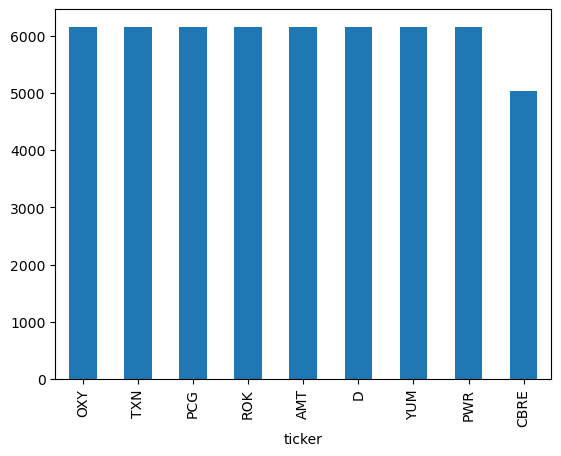

In [7]:
small_df['ticker'].value_counts().plot(kind='bar')

<Axes: xlabel='ticker'>

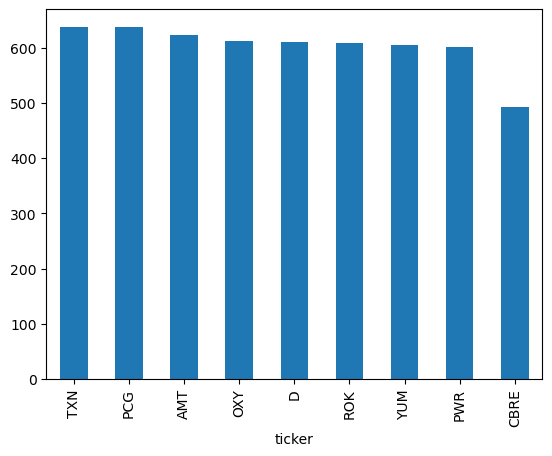

In [8]:
simple_sample_dt['ticker'].value_counts().plot(kind='bar')

## Stratified Sampling

+ Use `groupby()` and `.sample()` for stratified sampling.

<Axes: xlabel='ticker'>

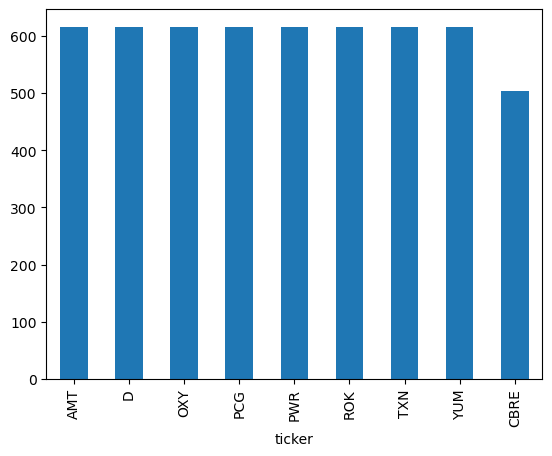

In [9]:
strat_sample_dt = small_df.groupby(['ticker']).sample(frac = 0.1)
strat_sample_dt['ticker'].value_counts().plot(kind='bar')

# Sampling in Dask

+ Stratified sampling in `dask` can be achieved with `groupby().apply()` and a lambda function.

C:\Users\klawa\AppData\Local\Temp\ipykernel_55248\2932236319.py:2: UserWarning: `meta` is not specified, inferred from partial data. Please provide `meta` if the result is unexpected.
  Before: .apply(func)
  After:  .apply(func, meta={'x': 'f8', 'y': 'f8'}) for dataframe result
  or:     .apply(func, meta=('x', 'f8'))            for series result
  strat_sample_dd_dt = (dd_dt


<Axes: xlabel='ticker'>

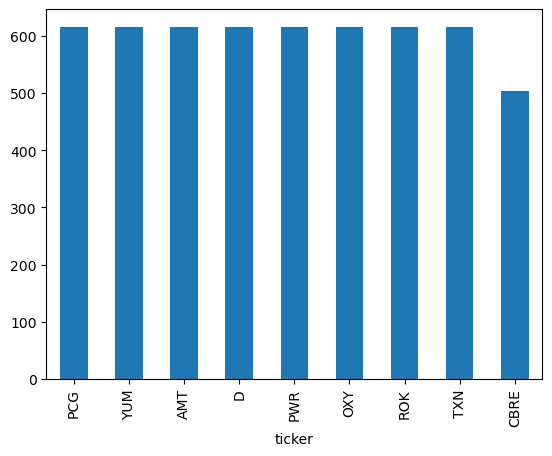

: 

In [10]:
dd_dt = dd.read_parquet(ft_glob)
strat_sample_dd_dt = (dd_dt
                      .groupby('ticker', group_keys=False)
                      .apply(lambda x: x.sample(frac = 0.1))
                      .compute()
                      .reset_index())
strat_sample_dd_dt[strat_sample_dd_dt['ticker'].isin(select_tickers)]['ticker'].value_counts().plot(kind='bar')